In [1]:
import torch

In [6]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
W = torch.zeros(1)
hypothesis = x_train * W
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]])


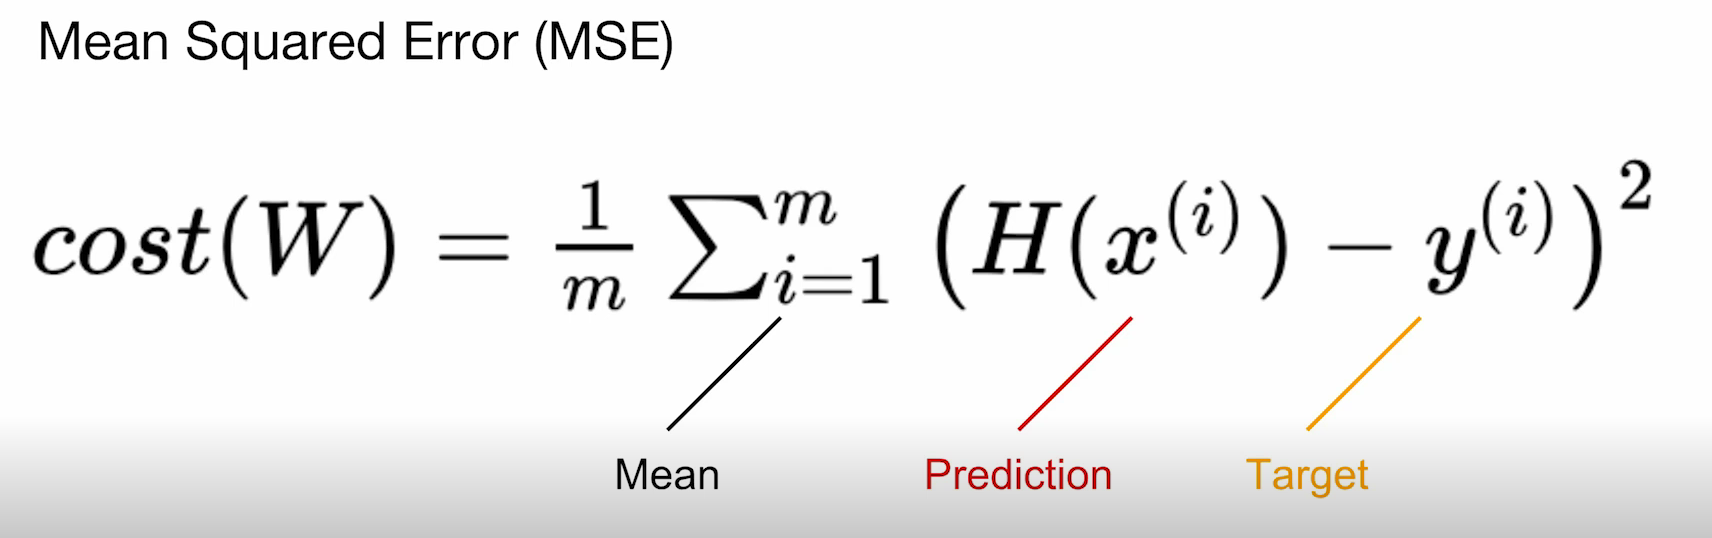

In [7]:
# cost function
cost = torch.mean((hypothesis -  y_train) **2)

# cost function 최소화하기
# Gradient 계산 -> 미분
gradient = 2 * torch.mean((W * x_train - y_train) * x_train)
lr = 0.1
W -= lr * gradient

In [8]:
# full code
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
W = torch.zeros(1)
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = x_train +W

  # cost gradient 계산
  cost = torch.mean((hypothesis - y_train) ** 2)
  gradient = torch.sum((W * x_train - y_train) + x_train)
  print("Epoch {:4d}/{} W : {:.3f}, Cost : {:.6f}".format(epoch, nb_epochs, W.item(), cost.item()))

  W -= lr *gradient

Epoch    0/10 W : 0.000, Cost : 4.666667
Epoch    1/10 W : 0.600, Cost : 2.626667
Epoch    2/10 W : 0.840, Cost : 2.012267
Epoch    3/10 W : 0.936, Cost : 1.798763
Epoch    4/10 W : 0.974, Cost : 1.718522
Epoch    5/10 W : 0.990, Cost : 1.687252
Epoch    6/10 W : 0.996, Cost : 1.674876
Epoch    7/10 W : 0.998, Cost : 1.669946
Epoch    8/10 W : 0.999, Cost : 1.667978
Epoch    9/10 W : 1.000, Cost : 1.667191
Epoch   10/10 W : 1.000, Cost : 1.666876


In [ ]:
# torch.optim으로 gradient descent 할 수 있음
optimizer = optim.SGD([W], lr = 0.15)

# cost로 H(x) 개선
optimizer.zero_grad() # gradient를 0으로 초기화
cost.backward() # gradient 계산
optimizer.step() # gradient descent

In [11]:
from torch import optim

In [13]:
# full code with torch.optim
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
W = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W], lr = 0.15)
nb_epochs = 10
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = x_train +W

  # cost gradient 계산
  cost = torch.mean((hypothesis - y_train) ** 2)

  print("Epoch {:4d}/{} W : {:.3f}, Cost : {:.6f}".format(epoch, nb_epochs, W.item(), cost.item()))

  optimizer.zero_grad() # gradient를 0으로 초기화
  cost.backward() # gradient 계산
  optimizer.step() # gradient descent

Epoch    0/10 W : 0.000, Cost : 4.666667
Epoch    1/10 W : 0.600, Cost : 2.626667
Epoch    2/10 W : 1.020, Cost : 1.627067
Epoch    3/10 W : 1.314, Cost : 1.137262
Epoch    4/10 W : 1.520, Cost : 0.897259
Epoch    5/10 W : 1.664, Cost : 0.779657
Epoch    6/10 W : 1.765, Cost : 0.722032
Epoch    7/10 W : 1.835, Cost : 0.693796
Epoch    8/10 W : 1.885, Cost : 0.679960
Epoch    9/10 W : 1.919, Cost : 0.673180
Epoch   10/10 W : 1.944, Cost : 0.669858


# Multivariate Linear Regression

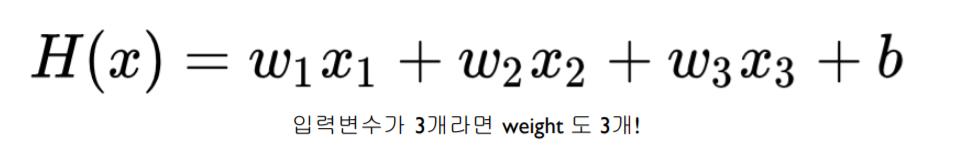

In [21]:
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# opimizer
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epoch = 20
for epoch in range(nb_epoch +1):

  #H(x)
  hypothesis = x_train.matmul(W) + b

  # cost 계산
  cost = torch.mean((hypothesis - y_train) **2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  print("Epoch {:4d}/{} hypothesis : {}, Cost : {:.6f}".format(epoch, nb_epoch, hypothesis.squeeze().detach(), cost.item()
  ))


Epoch    0/20 hypothesis : tensor([0., 0., 0., 0., 0.]), Cost : 29661.800781
Epoch    1/20 hypothesis : tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]), Cost : 9298.520508
Epoch    2/20 hypothesis : tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]), Cost : 2915.712402
Epoch    3/20 hypothesis : tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]), Cost : 915.040527
Epoch    4/20 hypothesis : tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]), Cost : 287.936096
Epoch    5/20 hypothesis : tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]), Cost : 91.371063
Epoch    6/20 hypothesis : tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]), Cost : 29.758249
Epoch    7/20 hypothesis : tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]), Cost : 10.445267
Epoch    8/20 hypothesis : tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]), Cost : 4.391237
Epoch    9/20 hypothesis : tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]), Cost

# weight가 너무 많이 필요한 문제 해결을 위해 nn.Module사용

In [29]:
import torch.nn as nn
import torch.nn.functional as F

In [30]:
# nn.Module

# nn.Module을 상속해서 모델 생성
# nnLinear(3,1) : 입력 차원  3, 출력차원 1
# hypothesis 계산은 forward()에서
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# hypothesis = x_train.matmul(W) + b

NameError: ignored

In [34]:
class MultivatiateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 1)
  
  def forward(self, x):
    return self.linear(x)


In [37]:
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# W = torch.zeros((3,1), requires_grad = True)
# b = torch.zeros(1, requires_grad = True)

model = MultivatiateLinearRegressionModel()
# opimizer
optimizer = optim.SGD(model.parameters(), lr=1e-5) 

nb_epoch = 20
for epoch in range(nb_epoch +1):

  #H(x)
  # hypothesis = x_train.matmul(W) + b
  hypothesis  =model(x_train)

  # cost 계산
  # cost = torch.mean((hypothesis - y_train) **2)
  cost = F.mse_loss(hypothesis, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  print("Epoch {:4d}/{} hypothesis : {}, Cost : {:.6f}".format(epoch, nb_epoch, hypothesis.squeeze().detach(), cost.item()
  ))


Epoch    0/20 hypothesis : tensor([11.1472, 10.1094, 11.5836, 13.5065,  6.1548]), Cost : 26109.626953
Epoch    1/20 hypothesis : tensor([74.2408, 85.9451, 86.3048, 94.8761, 63.9988]), Cost : 8189.475098
Epoch    2/20 hypothesis : tensor([109.5641, 128.4031, 128.1384, 140.4319,  96.3839]), Cost : 2572.457275
Epoch    3/20 hypothesis : tensor([129.3400, 152.1740, 151.5593, 165.9368, 114.5156]), Cost : 811.817139
Epoch    4/20 hypothesis : tensor([140.4112, 165.4828, 164.6717, 180.2159, 124.6673]), Cost : 259.947510
Epoch    5/20 hypothesis : tensor([146.6092, 172.9342, 172.0127, 188.2101, 130.3512]), Cost : 86.963074
Epoch    6/20 hypothesis : tensor([150.0788, 177.1063, 176.1225, 192.6857, 133.5339]), Cost : 32.739082
Epoch    7/20 hypothesis : tensor([152.0208, 179.4424, 178.4233, 195.1913, 135.3162]), Cost : 15.740222
Epoch    8/20 hypothesis : tensor([153.1077, 180.7506, 179.7113, 196.5940, 136.3144]), Cost : 10.409262
Epoch    9/20 hypothesis : tensor([153.7157, 181.4833, 180.4323, 